# Module 8 Assignment

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `# YOUR CODE HERE`. Do not write your answer anywhere else other than where it says `# YOUR CODE HERE`. Anything you write elsewhere will be removed or overwritten by the autograder.
2. Before you submit your assignment, make sure everything runs as expected. Go to the menubar, select Kernel, and restart the kernel and run all cells (Restart & Run all).
3. Do not change the title (i.e. file name) of this notebook.
4. Make sure that you save your work (in the menubar, select File → Save and CheckPoint).
5. All work must be your own, if you do use any code from another source (such as a course notebook or a website) you need to properly cite the source.

-----

In [1]:
%matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import DBSCAN

from collections import Counter

#from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_is_not

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

-----

## Loading Breast Cancer Data

In this assignment, we will work with a breast cancer data set to make predictive models. Before we build a model, we first load the data into the assignment notebook, and randomly sample several rows. The second Code cell splits the DataFrame into a training and testing data set, respectively, before creating the features and labels to use for our classification task.

-----

In [2]:
#Load data
df = pd.read_csv('breast-cancer-wisconsin.data')
df.sample(5)

,id,clump thickness,uniformity cell size,uniformity cell shape,marginal adhesion,epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
605,1096352,6,3,3,3,3,2,6,1,1,2
183,1208301,1,2,3,1,2,1,3,1,1,2
304,709287,6,8,7,8,6,8,8,9,1,4
10,1035283,1,1,1,1,1,1,3,1,1,2
614,1225382,6,2,3,1,2,1,1,1,1,2


In [3]:
# Create features and labels
y = df['class']
X = df.drop('class', axis=1)

# Split data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

-----

## Problem 1: Visualizing Anomalies

For this problem, you will generate a comparative histogram to identify how data can be differentiated visually. Specifically, you will use the `data` list, created from the _Breast Cancer_ data set, where the first list element contains data with `class==2` and the second element contains data with `class==4`. You must complete the following tasks to make this plot:

- Create a figure and axes object, name the axes object `axs`.
- Call the `hist` method on your axes object to make a histogram.
  - Plot the `data` list.
  - Use ten bins.
  - Use a `bar` type histogram.
  - Label the two histograms.
  - Capture the output of the `hist` plot function in three variables.
    - n: bin counts
    - b: bin edges
    - p: histogram plot components
- Title the plot.
- Define X and Y axis labels.
- Create a suitable legend.

When finished, your histogram should look similar to the following plot:

![Comparative Histogram](ch.png)

While the sample plot calls the `despine` method in the Seaborn module, this is not required for this problem.

Looking at this plot, think about how you might statistically separate these two classes.

----

In [4]:
df.head()

,id,clump thickness,uniformity cell size,uniformity cell shape,marginal adhesion,epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


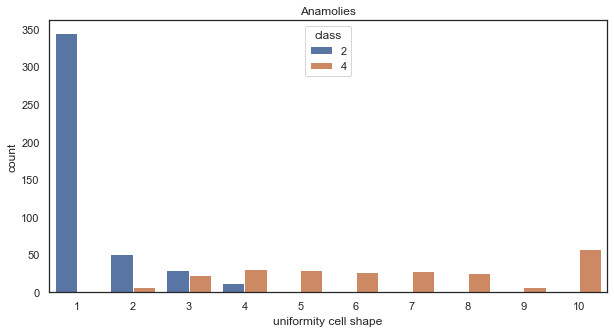

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(x="uniformity cell shape", hue="class", data=df)
plt.title("Anamolies")
plt.show()

In [6]:
# We create two lists to compare from the cancer data
# data = []

# data.append(df.loc[df['class'] == 2, ['uniformity cell shape']].as_matrix())
# data.append(df.loc[df['class'] == 4, ['uniformity cell shape']].as_matrix())

### YOUR CODE HERE

In [7]:
# Test histogram results were captured
# assert_is_instance(n, list)

# Test bin counts
# assert_equal(n[0][0], 344, msg='')
# assert_equal(n[0][-1], 0)
# assert_equal(n[1][0], 2)
# assert_equal(n[1][-1], 58)

# Test plot decorations
# assert_is_instance(axs, mpl.axes.Axes, 
#                    msg='You need to create and use an Axes object.')  

# assert_is_not(len(axs.title.get_text()), 0, 
#               msg="Your plot doesn't have a title.")

# assert_is_not(axs.xaxis.get_label_text(), '', 
#               msg="Change the x-axis label to something more descriptive.")

# assert_is_not(axs.yaxis.get_label_text(), '', 
#               msg="Change the y-axis label to something more descriptive.")

# assert_is_instance(axs.legend_, mpl.legend.Legend, 
#                    msg="Your plot doesn't have a Legend")

-----

## Problem 2: DBSCAN for Anomaly Detection

For this problem, you will complete the `DBSCAN_detect` function that uses DBSCAN to perform anomaly detection. Specifically, you must complete the following tasks:
- Create an [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.dbscan.html) estimator by using the scikit learn library's implementation.
  - Set the `eps` parameter to the `eps` argument passed into the function you are completing.
  - Leave other hyperparameters set to their default values.
- Fit DBSCAN to the training data. 
- Extract the cluster labels from the DBSCAN model.
- Return these labels.

-----

In [8]:
X_train.iloc[:, 1:3]

,clump thickness,uniformity cell size
312,10,1
202,1,1
263,5,1
395,3,1
101,8,2
...,...,...
9,4,2
359,5,1
192,1,1
629,3,1


In [9]:
dbscan = DBSCAN(eps=0.5).fit(X_train.iloc[:, 1:3])

In [10]:
dbscan.labels_

array([-1,  0,  1,  2, -1,  0,  3,  4,  5,  6,  0,  7,  2,  8,  9,  2,  3,
        0, 10, -1, -1,  0,  8, -1, 11, 12,  9, 13,  4,  1,  4,  1, -1,  3,
       -1, -1,  6,  0,  0,  0, -1,  2,  3, -1, -1,  1, -1,  0,  0, -1,  6,
        0,  0,  2,  2,  2,  0,  2,  0,  4,  4, -1,  0,  1,  0,  2,  2, 13,
       -1,  4,  6, 14, 15, -1, 16,  2,  0,  0,  3, -1, -1, 17, 14, -1, 16,
        3,  2,  9, 12,  0,  6,  4, 18, 11,  3,  3,  0, -1,  4, -1, 17,  9,
        2,  0,  2,  0,  3, 16,  1,  4,  8,  0,  2, 13,  0,  4,  0,  3,  7,
       -1,  1,  4, 16,  1, 16, -1,  7, 12, 19, -1,  0, -1,  2, 17,  0,  3,
        8, -1,  1,  4,  4, -1,  4,  1, 20, -1, 14,  2, -1,  0,  3,  0,  1,
        1,  2,  4,  8, 10, 21,  7, -1,  9,  3, -1,  0,  0,  2, -1,  2,  2,
        3, -1, -1,  2, 18,  0,  3,  6,  3,  3,  4,  1,  1, 14,  0, 14, -1,
       12, 15, 20, 21,  1, 16,  2, -1, 19, -1,  0,  1, -1,  1,  0,  2,  0,
       18, -1,  1,  0,  1, -1,  0, -1,  6, -1, 22,  2,  0, -1, -1,  1,  3,
       21,  0,  2,  0,  0

In [11]:
np.unique(dbscan, return_counts=True)

(array([DBSCAN()], dtype=object), array([1], dtype=int64))

In [12]:
# def DBSCAN_detect(eps, X_train):
#     """
#     Applies the DBSCAN clustering algorithm to data to determine noise (or outliers) and
#     cluster labels
    
#     Parameters:
#     -----------
#     eps: The maximum distance between samples for them to be considered 
#          in the same neighborhood
#     X_train: The data to cluster
    
    
#     Returns:
#     --------
#     labels: The cluster label for each datapoint
#     """
    
#     ### YOUR CODE HERE
    
#     return labels

In [13]:
# Identify noise points and assign cluster labels
# labels = DBSCAN_detect(.5, X_train.iloc[:, 1:3])

# Test Function
# assert_is_instance(labels, np.ndarray)
# assert_equal(labels[1], 0)
# assert_equal(len(labels), 546)

-----

## Problem 3: Computing Cluster Membership

For this problem, you will complete the `compute_membership` function that will use the `Counter` data structure to determine noise and cluster membership given a set of cluster labels (via the `lbls` argument). Specifically, you must complete the following tasks:
- Create a `Counter` from the cluster labels in the `lbls` argument.
- Iterate through the Counter:
  - For any item in the `Counter` with a negative label, append the count for that label to the noise list.
  - For any item with a non-negative label, append the count for that label to the clusters list.
- Return the noise and cluster lists, in that order.

-----

In [14]:
dbscan_df = pd.DataFrame(dbscan.labels_, columns=["label"])

In [15]:
dbscan_df

,label
0,-1
1,0
2,1
3,2
4,-1
...,...
541,10
542,1
543,0
544,2


In [16]:
dbscan_df.value_counts()

label
-1       109
 0        97
 2        56
 1        52
 4        47
 3        37
 16       20
 9        12
 6        11
 22       10
 14        9
 11        9
 8         9
 7         7
 21        7
 10        6
 12        6
 13        6
 17        6
 15        5
 18        5
 19        5
 20        5
 5         5
 23        5
dtype: int64

In [17]:
# def compute_membership(lbls):
#     """
#     Determines cluster or noise membership based on labels assigned by clustering algorithm.
    
#     Parameters:
#     -----------
#     lbls: The cluster labels for each instance in the data set    
    
#     Returns:
#     --------
#     noise and clusters: Two lists the hold the number of noise instances, 
#                         and the number of instances in each cluster, respectively
#     """
    
#     ### YOUR CODE HERE

#     return noise, clusters

In [18]:
# Extract the noise and cluster lists
#n, c = compute_membership(labels)

# Test the noise and cluster lists
# assert_equal(n[0], 109)
# assert_equal(c[0], 97)
# assert_equal(c[-1], 5)
# assert_equal(len(c), 24)

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode 